In [1]:
import pandas as pd
import numpy as np
import random as rn
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#import sklearn_relief as sr
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn import preprocessing

from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import mutual_info_classif

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.linear_model import LogisticRegression

import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.backend as K
from tensorflow.keras import layers, losses
from tensorboard.plugins.hparams import api as hp
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model


RANDOM_SEED = 1001
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)
rn.seed(RANDOM_SEED)

sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 16})

pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_excel("df_p.xlsx")

In [3]:
df = df.set_index(pd.DatetimeIndex(df['date']))

df = df.drop(['date'], axis=1)

In [4]:
df.head()

,SP500,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,ADS,ADSK,AEE,AEP,AES,AET,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,ALB,ALK,ALL,ALLE,ALXN,AMAT,AME,AMG,AMGN,AMP,AMT,AMZN,AN,ANTM,AON,APA,APC,APD,APH,ARNC,ATVI,AVB,AVGO,AVY,...,ULTA,UNH,UNM,UNP,UPS,URBN,URI,USB,UTX,V,VAR,VFC,VIAB,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VZ,WAT,WBA,WDC,WEC,WFC,WFM,WHR,WLTW,WM,WMB,WMT,WRK,WU,WY,WYN,WYNN,XEC,XEL,XL,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-04,1132.99,31.300001,4.77,40.380001,214.009998,NaN,26.629999,54.459951,42.070000,37.090000,31.670000,31.469999,42.830002,65.889999,25.670000,27.760000,34.939999,13.67,33.000000,47.570000,40.290001,29.889999,15.960000,30.160000,22.330000,25.920000,38.090000,34.869999,30.410000,NaN,48.250000,14.30,38.600000,68.879997,57.720001,39.880001,43.459999,133.899994,19.270000,59.750000,37.939999,105.870003,64.739998,83.160000,45.939999,16.650013,11.30,81.199997,18.860001,36.849998,...,18.850000,31.530001,19.940001,65.389999,58.180000,34.910000,10.04,22.879999,71.629997,88.139999,47.169998,73.379997,29.980000,17.889997,52.730000,70.019993,29.850000,24.740000,44.240002,43.349998,33.279869,61.630001,37.299999,45.259998,49.730000,27.320000,27.850000,81.949997,NaN,34.160000,21.609949,54.230000,NaN,19.090000,44.279999,20.280001,63.959999,55.169998,21.080000,18.719999,25.379999,69.150002,35.330002,8.63,NaN,17.100000,35.090001,60.020000,13.33,NaN
2010-01-05,1136.52,30.960001,5.31,40.139999,214.379993,NaN,26.440001,54.019953,42.330002,37.700001,31.620001,31.639999,42.600003,66.019997,25.280001,27.650000,34.540001,13.53,32.529999,48.950001,39.889999,29.330000,16.360001,31.059999,22.209999,26.690001,38.020000,36.779999,30.910000,NaN,47.560001,14.19,38.430000,69.430000,57.220001,40.810001,44.180000,134.690002,19.570000,60.400002,37.700001,107.120003,66.559998,82.470000,44.980000,16.130013,11.32,80.589996,19.000000,37.090000,...,18.760000,31.480000,20.230000,66.300003,58.279999,35.560001,9.93,23.459999,70.559998,87.129997,47.840000,74.779999,30.040001,18.350001,52.930000,69.489998,30.049999,25.000000,42.779999,43.560001,33.339868,60.790001,37.000000,46.459999,49.080002,28.070000,27.620001,81.779999,NaN,34.009998,21.879956,53.689999,NaN,19.010000,45.220001,20.709999,67.849998,55.070000,20.830000,18.590000,25.059999,69.419998,34.910000,8.64,NaN,17.230000,34.970000,61.919998,13.80,NaN
2010-01-06,1137.14,30.850001,5.09,40.490002,210.969995,NaN,26.190001,54.319953,42.779999,37.619999,31.559999,31.559999,42.500004,66.349998,25.340000,27.459999,34.889999,13.39,32.400002,49.380001,40.020000,29.139999,16.650000,30.969999,22.219999,26.469999,38.090000,36.450001,30.920000,NaN,47.680000,14.16,38.470001,70.790001,56.790001,41.380001,44.410000,132.250000,20.320000,61.380001,37.689999,108.800003,67.139999,81.789996,45.150002,16.970013,11.26,79.830002,19.150000,37.009998,...,19.219999,31.790001,20.410000,66.400002,57.849998,35.279999,9.93,23.709999,70.190002,85.959999,48.130001,74.480003,29.889999,18.809996,53.849998,69.210001,30.440001,24.730000,42.029999,43.070000,31.919873,60.900002,36.720001,46.500000,49.580002,28.110001,27.940001,81.059998,NaN,34.000000,22.589952,53.570000,NaN,19.000000,44.720001,21.100000,66.959999,54.990002,20.870001,18.400000,24.889999,70.019997,35.139999,8.56,NaN,17.170000,34.720002,61.900002,15.00,NaN
2010-01-07,1141.69,30.809999,5.24,40.480000,210.580000,NaN,25.770000,54.769952,42.740002,36.889999,31.309999,31.230000,42.480000,66.959999,25.480000,27.200001,35.189999,13.40,33.430000,49.910000,39.700001,28.580000,17.260000,31.350000,22.080000,26.480000,37.820000,36.259998,31.080000,NaN,47.860001,14.01,38.569998,70.470001,56.270000,41.689999,44.290001,130.000000,20.680000,63.660000,37.580002,107.150002,67.029999,81.319994,44.849998,16.610014,10.99,79.989998,19.030001,37.360001,...,20.860001,33.009998,20.860001,65.809998,57.410000,34.080002,9.80,24.170000,70.489998,86.760002,47.340000,75.919998,30.200001,18.950005,5

In [5]:
sp500 = df.pop('SP500')

df.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,ADS,ADSK,AEE,AEP,AES,AET,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,ALB,ALK,ALL,ALLE,ALXN,AMAT,AME,AMG,AMGN,AMP,AMT,AMZN,AN,ANTM,AON,APA,APC,APD,APH,ARNC,ATVI,AVB,AVGO,AVY,AWK,...,ULTA,UNH,UNM,UNP,UPS,URBN,URI,USB,UTX,V,VAR,VFC,VIAB,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VZ,WAT,WBA,WDC,WEC,WFC,WFM,WHR,WLTW,WM,WMB,WMT,WRK,WU,WY,WYN,WYNN,XEC,XEL,XL,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-04,31.300001,4.77,40.380001,214.009998,NaN,26.629999,54.459951,42.070000,37.090000,31.670000,31.469999,42.830002,65.889999,25.670000,27.760000,34.939999,13.67,33.000000,47.570000,40.290001,29.889999,15.960000,30.160000,22.330000,25.920000,38.090000,34.869999,30.410000,NaN,48.250000,14.30,38.600000,68.879997,57.720001,39.880001,43.459999,133.899994,19.270000,59.750000,37.939999,105.870003,64.739998,83.160000,45.939999,16.650013,11.30,81.199997,18.860001,36.849998,22.650000,...,18.850000,31.530001,19.940001,65.389999,58.180000,34.910000,10.04,22.879999,71.629997,88.139999,47.169998,73.379997,29.980000,17.889997,52.730000,70.019993,29.850000,24.740000,44.240002,43.349998,33.279869,61.630001,37.299999,45.259998,49.730000,27.320000,27.850000,81.949997,NaN,34.160000,21.609949,54.230000,NaN,19.090000,44.279999,20.280001,63.959999,55.169998,21.080000,18.719999,25.379999,69.150002,35.330002,8.63,NaN,17.100000,35.090001,60.020000,13.33,NaN
2010-01-05,30.960001,5.31,40.139999,214.379993,NaN,26.440001,54.019953,42.330002,37.700001,31.620001,31.639999,42.600003,66.019997,25.280001,27.650000,34.540001,13.53,32.529999,48.950001,39.889999,29.330000,16.360001,31.059999,22.209999,26.690001,38.020000,36.779999,30.910000,NaN,47.560001,14.19,38.430000,69.430000,57.220001,40.810001,44.180000,134.690002,19.570000,60.400002,37.700001,107.120003,66.559998,82.470000,44.980000,16.130013,11.32,80.589996,19.000000,37.090000,22.879999,...,18.760000,31.480000,20.230000,66.300003,58.279999,35.560001,9.93,23.459999,70.559998,87.129997,47.840000,74.779999,30.040001,18.350001,52.930000,69.489998,30.049999,25.000000,42.779999,43.560001,33.339868,60.790001,37.000000,46.459999,49.080002,28.070000,27.620001,81.779999,NaN,34.009998,21.879956,53.689999,NaN,19.010000,45.220001,20.709999,67.849998,55.070000,20.830000,18.590000,25.059999,69.419998,34.910000,8.64,NaN,17.230000,34.970000,61.919998,13.80,NaN
2010-01-06,30.850001,5.09,40.490002,210.969995,NaN,26.190001,54.319953,42.779999,37.619999,31.559999,31.559999,42.500004,66.349998,25.340000,27.459999,34.889999,13.39,32.400002,49.380001,40.020000,29.139999,16.650000,30.969999,22.219999,26.469999,38.090000,36.450001,30.920000,NaN,47.680000,14.16,38.470001,70.790001,56.790001,41.380001,44.410000,132.250000,20.320000,61.380001,37.689999,108.800003,67.139999,81.789996,45.150002,16.970013,11.26,79.830002,19.150000,37.009998,23.000000,...,19.219999,31.790001,20.410000,66.400002,57.849998,35.279999,9.93,23.709999,70.190002,85.959999,48.130001,74.480003,29.889999,18.809996,53.849998,69.210001,30.440001,24.730000,42.029999,43.070000,31.919873,60.900002,36.720001,46.500000,49.580002,28.110001,27.940001,81.059998,NaN,34.000000,22.589952,53.570000,NaN,19.000000,44.720001,21.100000,66.959999,54.990002,20.870001,18.400000,24.889999,70.019997,35.139999,8.56,NaN,17.170000,34.720002,61.900002,15.00,NaN
2010-01-07,30.809999,5.24,40.480000,210.580000,NaN,25.770000,54.769952,42.740002,36.889999,31.309999,31.230000,42.480000,66.959999,25.480000,27.200001,35.189999,13.40,33.430000,49.910000,39.700001,28.580000,17.260000,31.350000,22.080000,26.480000,37.820000,36.259998,31.080000,NaN,47.860001,14.01,38.569998,70.470001,56.270000,41.689999,44.290001,130.000000,20.680000,63.660000,37.580002,107.150002,67.029999,81.319994,44.849998,16.610014,10.99,79.989998,19.030001,37.360001,23.049999,...,20.860001,33.009998,20.860001,65.809998,57.410000,34.080002,9.80,24.170000,70.489998,86.760002,47.340000,75.919998,30.200001,18.95

In [6]:
df.dropna(axis=1, inplace=True)

df.head()

,A,AAL,AAP,AAPL,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,ADS,ADSK,AEE,AEP,AES,AET,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,ALB,ALK,ALL,ALXN,AMAT,AME,AMG,AMGN,AMP,AMT,AMZN,AN,ANTM,AON,APA,APC,APD,APH,ARNC,ATVI,AVB,AVGO,AVY,AWK,AXP,AYI,...,UAA,UAL,UDR,UHS,ULTA,UNH,UNM,UNP,UPS,URBN,URI,USB,UTX,V,VAR,VFC,VIAB,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VZ,WAT,WBA,WDC,WEC,WFC,WFM,WHR,WM,WMB,WMT,WU,WY,WYN,WYNN,XEC,XEL,XL,XLNX,XOM,XRAY,XRX,YHOO,YUM,ZBH,ZION
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-04,31.300001,4.77,40.380001,214.009998,26.629999,54.459951,42.070000,37.090000,31.670000,31.469999,42.830002,65.889999,25.670000,27.760000,34.939999,13.67,33.000000,47.570000,40.290001,29.889999,15.960000,30.160000,22.330000,25.920000,38.090000,34.869999,30.410000,48.250000,14.30,38.600000,68.879997,57.720001,39.880001,43.459999,133.899994,19.270000,59.750000,37.939999,105.870003,64.739998,83.160000,45.939999,16.650013,11.30,81.199997,18.860001,36.849998,22.650000,40.919998,36.029999,...,28.080000,12.80,16.209999,31.150000,18.850000,31.530001,19.940001,65.389999,58.180000,34.910000,10.04,22.879999,71.629997,88.139999,47.169998,73.379997,29.980000,17.889997,52.730000,70.019993,29.850000,24.740000,44.240002,43.349998,33.279869,61.630001,37.299999,45.259998,49.730000,27.320000,27.850000,81.949997,34.160000,21.609949,54.230000,19.090000,44.279999,20.280001,63.959999,55.169998,21.080000,18.719999,25.379999,69.150002,35.330002,8.63,17.100000,35.090001,60.020000,13.33
2010-01-05,30.960001,5.31,40.139999,214.379993,26.440001,54.019953,42.330002,37.700001,31.620001,31.639999,42.600003,66.019997,25.280001,27.650000,34.540001,13.53,32.529999,48.950001,39.889999,29.330000,16.360001,31.059999,22.209999,26.690001,38.020000,36.779999,30.910000,47.560001,14.19,38.430000,69.430000,57.220001,40.810001,44.180000,134.690002,19.570000,60.400002,37.700001,107.120003,66.559998,82.470000,44.980000,16.130013,11.32,80.589996,19.000000,37.090000,22.879999,40.830002,36.330002,...,28.920000,13.91,16.190001,30.900000,18.760000,31.480000,20.230000,66.300003,58.279999,35.560001,9.93,23.459999,70.559998,87.129997,47.840000,74.779999,30.040001,18.350001,52.930000,69.489998,30.049999,25.000000,42.779999,43.560001,33.339868,60.790001,37.000000,46.459999,49.080002,28.070000,27.620001,81.779999,34.009998,21.879956,53.689999,19.010000,45.220001,20.709999,67.849998,55.070000,20.830000,18.590000,25.059999,69.419998,34.910000,8.64,17.230000,34.970000,61.919998,13.80
2010-01-06,30.850001,5.09,40.490002,210.969995,26.190001,54.319953,42.779999,37.619999,31.559999,31.559999,42.500004,66.349998,25.340000,27.459999,34.889999,13.39,32.400002,49.380001,40.020000,29.139999,16.650000,30.969999,22.219999,26.469999,38.090000,36.450001,30.920000,47.680000,14.16,38.470001,70.790001,56.790001,41.380001,44.410000,132.250000,20.320000,61.380001,37.689999,108.800003,67.139999,81.789996,45.150002,16.970013,11.26,79.830002,19.150000,37.009998,23.000000,41.490002,36.849998,...,29.559999,13.27,16.080000,30.750000,19.219999,31.790001,20.410000,66.400002,57.849998,35.279999,9.93,23.709999,70.190002,85.959999,48.130001,74.480003,29.889999,18.809996,53.849998,69.210001,30.440001,24.730000,42.029999,43.070000,31.919873,60.900002,36.720001,46.500000,49.580002,28.110001,27.940001,81.059998,34.000000,22.589952,53.570000,19.000000,44.720001,21.100000,66.959999,54.990002,20.870001,18.400000,24.889999,70.019997,35.139999,8.56,17.170000,34.720002,61.900002,15.00
2010-01-07,30.809999,5.24,40.480000,210.580000,25.770000,54.769952,42.740002,36.889999,31.309999,31.230000,42.480000,66.959999,25.480000,27.200001,35.189999,13.40,33.430000,49.910000,39.700001,28.580000,17.260000,31.350000,22.080000,26.480000,37.820000,36.259998,31.080000,47.860001,14.01,38.569998,70.470001,56.270000,41.689999,44.290001,130.000000,20.680000,63.660000,37.580002,107.150002,67.029999,81.319994,44.849998,16.610014,10.99,79.989998,19.030001,37.360001,23.049999,41.980000,38.000000,...,29.209999,13.55,16.200001

In [7]:
features_from_FI = ['HON', 'HSIC', 'SNA', 'PPG', 'MMC', 'IBM', 'ISRG', 'TDC',
       'TSCO', 'WFM', 'CAT', 'CHRW', 'EXPD', 'FMC', 'OKE', 'ETR', 'EW', 'INTC',
       'MNST', 'NKE', 'ALK', 'DLTR', 'TJX', 'UAA']

In [8]:
features_from_PCA = ['WFC', 'OMC', 'DIS', 'AMP', 'HON', 'VIAB', 'ADBE', 'IVZ',
       'ECL', 'GPC', 'AXP', 'BLK', 'TWX', 'KMX', 'V', 'YHOO', 'COST', 'ADP',
       'KR', 'BIIB', 'BA', 'AMG', 'BDX', 'ORCL']

In [9]:
if features_from_FI == features_from_PCA:
    print("Are equals")
else:
    print("The features arn´t equals")

The features arn´t equals


In [10]:
features = list(set(features_from_FI) | set(features_from_PCA))

print(len(features), features)

47 ['AMP', 'SNA', 'AXP', 'ADP', 'IBM', 'EW', 'CHRW', 'OKE', 'WFC', 'ORCL', 'KR', 'PPG', 'MNST', 'BLK', 'DLTR', 'IVZ', 'COST', 'BA', 'FMC', 'OMC', 'V', 'WFM', 'BIIB', 'HSIC', 'UAA', 'ADBE', 'YHOO', 'BDX', 'ETR', 'TSCO', 'NKE', 'KMX', 'TJX', 'GPC', 'INTC', 'VIAB', 'CAT', 'ALK', 'ECL', 'EXPD', 'DIS', 'HON', 'TDC', 'TWX', 'MMC', 'AMG', 'ISRG']


Aquí voy a trabajar sólamente con las variables obtenidas mediante RandomForest

In [11]:
df_ = df[features_from_FI]

In [12]:
df_.insert(0, 'SP500', sp500)

df_.dropna(axis=0, inplace=True)

df_.head()

<ipython-input-12-305c418f3a67>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_.dropna(axis=0, inplace=True)


,SP500,HON,HSIC,SNA,PPG,MMC,IBM,ISRG,TDC,TSCO,WFM,CAT,CHRW,EXPD,FMC,OKE,ETR,EW,INTC,MNST,NKE,ALK,DLTR,TJX,UAA
date,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-04,1132.99,40.349998,53.430000,42.860001,60.599998,21.870001,132.449997,308.769989,30.870001,53.340000,27.850000,58.549999,59.340000,35.080002,56.820000,45.579999,82.150002,87.470001,20.879999,39.280000,65.349998,34.869999,48.170002,36.040001,28.080000
2010-01-05,1136.52,40.430000,53.279999,42.840000,60.639999,21.340000,130.850006,307.380005,30.990000,52.779999,27.620001,59.250000,58.110001,35.320000,56.630001,45.180000,80.839996,88.099998,20.870001,39.430000,65.610001,36.779999,47.560000,37.009998,28.920000
2010-01-06,1137.14,40.430000,53.450001,43.080002,61.590000,21.990000,130.000000,311.839996,30.650000,52.669998,27.940001,59.430000,57.340000,34.500000,57.180000,45.440000,81.250000,89.070000,20.799999,40.250001,65.209999,36.450001,50.349998,37.160000,29.559999
2010-01-07,1141.69,41.209999,53.639999,43.799999,61.869999,22.270000,129.550003,310.670013,30.299999,53.389999,27.820000,59.669998,56.790001,34.290001,56.470001,45.140001,80.279999,89.879997,20.600000,40.090001,65.849998,36.259998,50.020002,39.060001,29.209999
2010-01-08,1144.98,42.119999,53.959999,44.709999,61.750000,22.160000,130.850006,308.959991,30.790001,53.360001,27.959999,60.340000,57.549999,34.650002,55.970001,45.400001,79.510002,89.480003,20.830000,40.290001,65.720001,35.540001,49.329998,38.549999,29.150000


La transformación logarítmica hace que la dispersión sea más o menos constante a medida que crece la media. O sea con esto logramos que la varianza sea constante.

In [13]:
df_LOG = df_.copy()

In [14]:
for col in df_LOG.columns:
  df_LOG[col] = np.log1p(df_LOG[col])

df_LOG

,SP500,HON,HSIC,SNA,PPG,MMC,IBM,ISRG,TDC,TSCO,WFM,CAT,CHRW,EXPD,FMC,OKE,ETR,EW,INTC,MNST,NKE,ALK,DLTR,TJX,UAA
date,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-04,7.033498,3.722072,3.996915,3.781003,4.120662,3.129826,4.893727,5.735830,3.461665,3.995261,3.362110,4.086816,4.099995,3.585739,4.057335,3.841171,4.420646,4.482664,3.085573,3.695855,4.194944,3.579901,3.895284,3.611998,3.370051
2010-01-05,7.036606,3.724005,3.994156,3.780547,4.121311,3.106379,4.881665,5.731333,3.465423,3.984902,3.354106,4.098503,4.079400,3.592369,4.054043,3.832547,4.404766,4.489759,3.085116,3.699572,4.198855,3.631780,3.882800,3.637849,3.398527
2010-01-06,7.037151,3.724005,3.997283,3.786006,4.136606,3.135059,4.875197,5.745692,3.454738,3.982854,3.365225,4.101486,4.066288,3.569533,4.063542,3.838161,4.409763,4.500587,3.081910,3.719651,4.192831,3.623007,3.938665,3.641788,3.419692
2010-01-07,7.041140,3.742657,4.000766,3.802208,4.141069,3.147165,4.871756,5.741945,3.443618,3.996180,3.361070,4.105449,4.056816,3.563600,4.051263,3.831680,4.397900,4.509540,3.072693,3.715765,4.202451,3.617920,3.932218,3.690378,3.408173
2010-01-08,7.044015,3.763987,4.006606,3.822317,4.139159,3.142427,4.881665,5.736443,3.459152,3.995629,3.365916,4.116432,4.069881,3.573749,4.042525,3.837299,4.388381,4.505129,3.083285,3.720620,4.200505,3.598408,3.918601,3.677566,3.406185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,7.725237,4.770600,5.035588,5.161409,4.561114,4.241614,5.122236,6.464199,3.331132,4.345492,3.493777,4.557240,4.324662,4.001864,4.055084,4.089164,4.302577,4.543295,3.636796,3.840957,3.968592,4.515574,4.378270,4.349503,3.410818
2016-12-27,7.727482,4.770939,5.038315,5.164672,4.573163,4.237001,5.124797,6.462265,3.343921,4.350665,3.487986,4.559650,4.323868,4.002960,4.065945,4.094844,4.304200,4.547011,3.639427,3.840097,3.956805,4.516776,4.370966,4.347047,3.411478
2016-12-28,7.719094,4.760035,5.032071,5.151788,4.560905,4.230040,5.119131,6.456063,3.335414,4.340293,3.472587,4.544889,4.310396,3.991019,4.054564,4.071928,4.290322,4.540205,3.627802,3.826683,3.951628,4.496359,4.365262,4.334804,3.415100


In [15]:
def linear_split_df(df):
    X = df.iloc[:,1:]
    y = df.iloc[:,0]

    X_train = X['2010-01-04':'2014-12-31']
    X_test = X['2015-01-01':'2016-12-30']

    y_train = y['2010-01-04':'2014-12-31']
    y_test = y['2015-01-01':'2016-12-30']

    return X_train, X_test, y_train, y_test

In [16]:
def split_df(df):
    X = df.iloc[:,1:]
    y = df.iloc[:,0]

    X_train = X['2010-01-04':'2013-12-31']
    X_val = X['2014-01-01':'2014-12-30']
    X_test = X['2015-01-01':'2016-12-30']

    y_train = y['2010-01-04':'2013-12-31']
    y_val = y['2014-01-01':'2014-12-30']
    y_test = y['2015-01-01':'2016-12-30']

    return X_train, X_val, X_test, y_train, y_val, y_test

In [17]:
X_train, X_test, y_train, y_test = linear_split_df(df_LOG)

In [18]:
scaler = StandardScaler()

In [19]:
#X_train_sc = scaler.fit_transform(X_train, y_train)

#X_test_sc = scaler.transform(X_test)

#y_train_sc = scaler.transform(y_train)

#y_test_sc = scaler.transform(y_test)

Linear Regression

In [20]:
model_LR = LinearRegression()

In [21]:
model_LR.fit(X_train, y_train)

LinearRegression()

In [22]:
y_predict_LR = model_LR.predict(X_test)


MSLE_LR = mean_squared_log_error(y_test, y_predict_LR)

MAE_LR = mean_absolute_error(y_test, y_predict_LR)

print(f'mean_absolute_error: {MAE_LR}  mean_squared_log_error: {MSLE_LR}')

mean_absolute_error: 0.05547974416337442  mean_squared_log_error: 5.736536031849493e-05


Test con Bayesian Ridge

In [23]:
model_RR = BayesianRidge()
model_RR.fit(X_train, y_train)

BayesianRidge()

In [24]:
y_predict_RR = model_RR.predict(X_test)


MSLE_RR = mean_squared_log_error(y_test, y_predict_RR)

MAE_RR = mean_absolute_error(y_test, y_predict_RR)

print(f'mean_absolute_error: {MAE_RR}  mean_squared_log_error: {MSLE_RR}')

mean_absolute_error: 0.05301887881850539  mean_squared_log_error: 5.281588038203673e-05


### LSTM

In [25]:
X_train, X_val, X_test, y_train, y_val, y_test = split_df(df_LOG)

X_train

,HON,HSIC,SNA,PPG,MMC,IBM,ISRG,TDC,TSCO,WFM,CAT,CHRW,EXPD,FMC,OKE,ETR,EW,INTC,MNST,NKE,ALK,DLTR,TJX,UAA
date,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-04,3.722072,3.996915,3.781003,4.120662,3.129826,4.893727,5.735830,3.461665,3.995261,3.362110,4.086816,4.099995,3.585739,4.057335,3.841171,4.420646,4.482664,3.085573,3.695855,4.194944,3.579901,3.895284,3.611998,3.370051
2010-01-05,3.724005,3.994156,3.780547,4.121311,3.106379,4.881665,5.731333,3.465423,3.984902,3.354106,4.098503,4.079400,3.592369,4.054043,3.832547,4.404766,4.489759,3.085116,3.699572,4.198855,3.631780,3.882800,3.637849,3.398527
2010-01-06,3.724005,3.997283,3.786006,4.136606,3.135059,4.875197,5.745692,3.454738,3.982854,3.365225,4.101486,4.066288,3.569533,4.063542,3.838161,4.409763,4.500587,3.081910,3.719651,4.192831,3.623007,3.938665,3.641788,3.419692
2010-01-07,3.742657,4.000766,3.802208,4.141069,3.147165,4.871756,5.741945,3.443618,3.996180,3.361070,4.105449,4.056816,3.563600,4.051263,3.831680,4.397900,4.509540,3.072693,3.715765,4.202451,3.617920,3.932218,3.690378,3.408173
2010-01-08,3.763987,4.006606,3.822317,4.139159,3.142427,4.881665,5.736443,3.459152,3.995629,3.365916,4.116432,4.069881,3.573749,4.042525,3.837299,4.388381,4.505129,3.083285,3.720620,4.200505,3.598408,3.918601,3.677566,3.406185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-23,4.507778,4.743279,4.690705,5.228431,3.893655,5.210742,5.919458,3.813307,4.343156,4.076690,4.510420,4.061132,3.797285,4.310128,4.104625,4.151670,4.197352,3.270329,4.221124,4.358118,4.294970,4.042876,4.154342,4.465103
2013-12-24,4.515792,4.746930,4.695925,5.239522,3.897721,5.216131,5.918786,3.814410,4.344844,4.077368,4.520810,4.061132,3.794815,4.323603,4.111038,4.154655,4.199005,3.274500,4.224788,4.365135,4.305955,4.050044,4.159352,4.468778
2013-12-26,4.522875,4.746930,4.699389,5.242170,3.898532,5.227627,5.929004,3.821879,4.345363,4.072099,4.523418,4.062682,3.798406,4.335983,4.112512,4.148991,4.195546,3.284664,4.226250,4.371850,4.301630,4.053175,4.168988,4.471296


In [26]:
"""
X_train_sc = scaler.fit_transform(X_train)

X_val_sc = scaler.transform(X_val)

X_test_sc = scaler.transform(X_test)

y_train_sc = scaler.transform(y_train)

y_val_sc = scaler.transform(y_val)

y_test_sc = scaler.transform(y_test)
"""

'\nX_train_sc = scaler.fit_transform(X_train)\n\nX_val_sc = scaler.transform(X_val)\n\nX_test_sc = scaler.transform(X_test)\n\ny_train_sc = scaler.transform(y_train)\n\ny_val_sc = scaler.transform(y_val)\n\ny_test_sc = scaler.transform(y_test)\n'

In [27]:
X_train.shape, y_train.shape

((999, 24), (999,))

In [28]:
"""
train_rd = X_train.to_numpy()

val_rd = X_val.to_numpy()

test_rd = X_test_sc.to_numpy()

train_ry = y_train_sc.to_numpy()

val_ry = y_val_sc.to_numpy()

test_ry = y_test_sc.to_numpy()
"""

'\ntrain_rd = X_train.to_numpy()\n\nval_rd = X_val.to_numpy()\n\ntest_rd = X_test_sc.to_numpy()\n\ntrain_ry = y_train_sc.to_numpy()\n\nval_ry = y_val_sc.to_numpy()\n\ntest_ry = y_test_sc.to_numpy()\n'

In [29]:
sequence_length = 1

step = 7

batch_size = 64

In [30]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    X_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [31]:
dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    X_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [32]:
dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    X_test,
    y_test,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [33]:
for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (64, 1, 24)
Target shape: (64,)


In [34]:
features = inputs.shape[2]

times_steps = inputs.shape[1]

Aquí utilizamos una NN con LSTM sencilla. Las LSTM se les pasa como parámetros las variables y los time_step (en este caso hemos seleccionado 1 como time_step). El time_step es el intervalo qde tiempo que quieres utilizar como base para la predicción. En este caso 1 para que sea "diario"

In [35]:

multi_lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, activation="linear", return_sequences=False, kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    
    tf.keras.layers.Dense(times_steps*features, kernel_initializer=tf.initializers.zeros),

    tf.keras.layers.Reshape([times_steps, features])
])

In [36]:
multi_lstm_model.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss=tf.keras.losses.MeanAbsoluteError(), metrics=[tf.keras.metrics.MeanSquaredLogarithmicError(), tf.keras.metrics.MeanAbsoluteError()])

In [37]:
history_LSTM = multi_lstm_model.fit(dataset_train, epochs=20, batch_size=64, validation_data=dataset_val, shuffle=True)


Epoch 1/20
16/16 [==============================] - 3s 96ms/step - loss: 4.5046 - mean_squared_logarithmic_error: 1.9713 - mean_absolute_error: 4.4736 - val_loss: 0.5758 - val_mean_squared_logarithmic_error: 0.0038 - val_mean_absolute_error: 0.5410
Epoch 2/20
16/16 [==============================] - 0s 9ms/step - loss: 0.5181 - mean_squared_logarithmic_error: 0.0046 - mean_absolute_error: 0.4857 - val_loss: 1.0874 - val_mean_squared_logarithmic_error: 0.0135 - val_mean_absolute_error: 1.0523
Epoch 3/20
16/16 [==============================] - 0s 8ms/step - loss: 0.5214 - mean_squared_logarithmic_error: 0.0047 - mean_absolute_error: 0.4905 - val_loss: 0.1597 - val_mean_squared_logarithmic_error: 2.7005e-04 - val_mean_absolute_error: 0.1269
Epoch 4/20
16/16 [==============================] - 0s 10ms/step - loss: 0.2808 - mean_squared_logarithmic_error: 0.0014 - mean_absolute_error: 0.2515 - val_loss: 0.3117 - val_mean_squared_logarithmic_error: 0.0011 - val_mean_absolute_error: 0.2805
Ep

In [38]:
# evaluación del modelo sobre los conjuntos de entrenamiento y pruebas
tra_L_res = multi_lstm_model.evaluate(dataset_train, verbose=0)
val_L_res = multi_lstm_model.evaluate(dataset_val, verbose=0)
test_L_res = multi_lstm_model.evaluate(dataset_test, verbose=0)
# impresión de resultados
print(f'MAE (loss) train: {tra_L_res[0]}, MSLE train: {tra_L_res[1]}')
print(f'MAE (loss) val: {val_L_res[0]}, MSLE val: {val_L_res[1]}')
print(f'MAE (loss) test: {test_L_res[0]}, MSLE test: {test_L_res[1]}')

MAE (loss) train: 0.32243451476097107, MSLE train: 0.0017924720887094736
MAE (loss) val: 0.19051003456115723, MSLE val: 0.0004659098922275007
MAE (loss) test: 0.17998835444450378, MSLE test: 0.0005149892531335354


In [39]:
MAE_LSTM = test_L_res[0]

MSLE_LSTM= test_L_res[1]

<ipython-input-40-873c1f200561>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


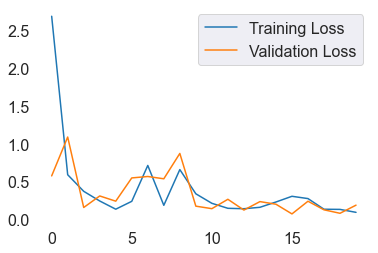

In [40]:
plt.plot(history_LSTM.history["loss"], label="Training Loss")
plt.plot(history_LSTM.history["val_loss"], label="Validation Loss")
plt.legend()

ax = plt.axes()
ax.set_facecolor("white")

In [41]:
test_pred = multi_lstm_model.predict(dataset_test)

###### Autoencoder LSTM

In [42]:
class Autoencoder_LSTM(Model):
    def __init__(self):
        super(Autoencoder_LSTM, self).__init__()
        self.encoder = tf.keras.Sequential([
          layers.Input(shape=(times_steps,features)),             
          layers.LSTM(16, activation="linear", return_sequences=True),
          layers.Dropout(rate=0.05), 
          layers.LSTM(8, activation="linear", return_sequences=False),            
          layers.RepeatVector(times_steps)])

        self.decoder = tf.keras.Sequential([           
          layers.LSTM(8, activation="linear", return_sequences=True),
          layers.Dropout(rate=0.05),
          layers.LSTM(16, activation="linear", return_sequences=True),
          layers.Dropout(rate=0.05),
          layers.TimeDistributed(tf.keras.layers.Dense(features))])
    
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


autoencoder = Autoencoder_LSTM()

In [43]:
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss=tf.keras.losses.MeanAbsoluteError(), metrics=[tf.keras.metrics.MeanSquaredLogarithmicError(), tf.keras.metrics.MeanAbsoluteError()])

In [44]:
history_Autoencoder = autoencoder.fit(dataset_train, 
          epochs=20, 
          batch_size=128,
          validation_data=dataset_val,
          shuffle=True)

Epoch 1/20
16/16 [==============================] - 5s 52ms/step - loss: 6.4815 - mean_squared_logarithmic_error: 3.3247 - mean_absolute_error: 6.4863 - val_loss: 2.5817 - val_mean_squared_logarithmic_error: 0.2813 - val_mean_absolute_error: 2.5815
Epoch 2/20
16/16 [==============================] - 0s 9ms/step - loss: 1.8369 - mean_squared_logarithmic_error: 0.1751 - mean_absolute_error: 1.8380 - val_loss: 0.8078 - val_mean_squared_logarithmic_error: 0.0128 - val_mean_absolute_error: 0.8081
Epoch 3/20
16/16 [==============================] - 0s 10ms/step - loss: 0.8448 - mean_squared_logarithmic_error: 0.0455 - mean_absolute_error: 0.8451 - val_loss: 0.7062 - val_mean_squared_logarithmic_error: 0.0084 - val_mean_absolute_error: 0.7061
Epoch 4/20
16/16 [==============================] - 0s 9ms/step - loss: 0.7498 - mean_squared_logarithmic_error: 0.0394 - mean_absolute_error: 0.7497 - val_loss: 0.2928 - val_mean_squared_logarithmic_error: 0.0014 - val_mean_absolute_error: 0.2922
Epoch 

In [45]:
tra_A_res = autoencoder.evaluate(dataset_train, verbose=0)
val_A_res = autoencoder.evaluate(dataset_val, verbose=0)
test_A_res = autoencoder.evaluate(dataset_test, verbose=0)
# impresión de resultados
print(f'MAE (loss) train: {tra_A_res[0]}, MSLE train: {tra_A_res[1]}')
print(f'MAE (loss) val: {val_A_res[0]}, MSLE val: {val_A_res[1]}')
print(f'MAE (loss) test: {test_A_res[0]}, MSLE test: {test_A_res[1]}')

MAE (loss) train: 0.1772243231534958, MSLE train: 0.0006390605121850967
MAE (loss) val: 0.21158462762832642, MSLE val: 0.0006481927703134716
MAE (loss) test: 0.28421834111213684, MSLE test: 0.0011422759853303432


<ipython-input-46-19b28c2e5be7>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


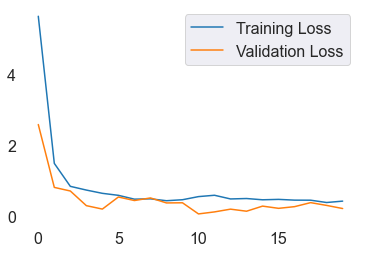

In [46]:
plt.plot(history_Autoencoder.history["loss"], label="Training Loss")
plt.plot(history_Autoencoder.history["val_loss"], label="Validation Loss")
plt.legend()

ax = plt.axes()
ax.set_facecolor("white")

In [47]:
MAE_A = test_A_res[0]

MSLE_A = test_A_res[1]

In [48]:
test_pred = autoencoder.predict(dataset_test)

<ipython-input-51-c595a722d054>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


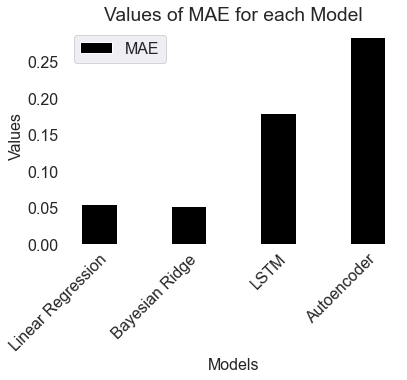

In [51]:
X = ['Linear Regression','Bayesian Ridge','LSTM','Autoencoder']
MAE = [MAE_LR, MAE_RR, MAE_LSTM, MAE_A]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis, MAE, 0.4, label = 'MAE', color = ['black'])

ax = plt.axes()
ax.set_facecolor("white")
  
plt.xticks(X_axis, X, rotation=45, ha='right', rotation_mode='anchor')
plt.xlabel("Models")
plt.ylabel("Values")
plt.title("Values of MAE for each Model")
plt.legend()
plt.show()

<ipython-input-52-dfb3ff207578>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


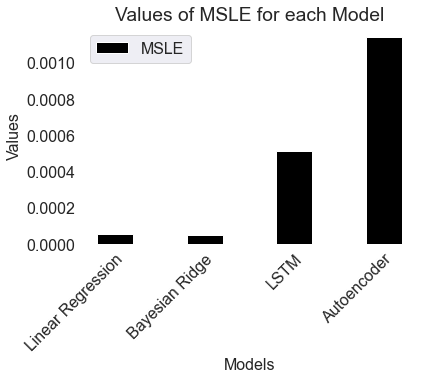

In [52]:
X = ['Linear Regression','Bayesian Ridge','LSTM','Autoencoder']

MSLE = [MSLE_LR, MSLE_RR, MSLE_LSTM, MSLE_A]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis, MSLE, 0.4, label = 'MSLE', color = ['black'])

ax = plt.axes()
ax.set_facecolor("white")
  
plt.xticks(X_axis, X, rotation=45, ha='right', rotation_mode='anchor')
plt.xlabel("Models")
plt.ylabel("Values")
plt.title("Values of MSLE for each Model")
plt.legend()
plt.show()

Como se observa, aunque los modelos más complejos (LSTM, Autoencoder) tienen una peor actuación que los modelos más sencillos (Linear regression, Bayesian Ridge) con sólamente 24 de las aproximadamente 500 variables dependientes que definen el índice SP500 se puede predecir su comportamiento con un ratio de error entre el conjunto test y la predicción sobre 0.0008. Esto es indicador que nuestra reducción de características ha cumplido su objetivo. Los modelos más complejos han tenido estos resultados debido a la utilización de funciones de activación lineales que limitan al conjunto de Redes Neuronales "aprender"  de forma adecuada el modelo, la utilización de funciones de activación no lineales se hubieran mejorado las métricas de esos modelos. 